In [1]:
import torch
import argparse
import os
    
import utils
import model

from torch.utils.data import DataLoader
from data_multi import PolyphonicDataset 

import nltk
import numpy as np
import matplotlib.pyplot as plt

c:\Users\pierr\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# RNN Decoder

In [27]:
path_to_model=""

In [28]:
#params = model.default_model_params()
corpus="./Dataset/"
voc_p="./vocab/rnn_pitch.txt"
voc_r="./vocab/rnn_rhythm.txt"

In [30]:
dict_file = open(voc_p,'r')
dict_list = dict_file.read().splitlines()
pitch_word2int = dict()
i=0
for word in dict_list:
    pitch_word2int[word] = i
    i+=1
pitch_word2int['+']=i
dict_file.close()

In [31]:
dict_file = open(voc_r,'r')
dict_list = dict_file.read().splitlines()
rhythm_word2int = dict()
i=0
for word in dict_list:
    rhythm_word2int[word] = i
    i+=1
rhythm_word2int['+']=i
dict_file.close()

In [63]:
def get_result(model_pred_folder):
    output_folder="./prediction/"
    pred_rhythm_folder=output_folder+model_pred_folder+"rythm/"
    pred_pitch_folder=output_folder+model_pred_folder+"pitch/"

    gt_rhythm_folder=corpus+"labels_length/"
    gt_pitch_folder=corpus+"labels_note/"

    with open(corpus+"test.txt", 'r') as f:
        test_files=[file + ".semantic" for file in f.read().split()]
        f.close()
    # Calculate SER of all test files
    SER_rhythm_list=[]
    SER_pitch_list=[]
    SER_pitch_list_poly=[]
    SER_rhythm_list_poly=[]
    SER_list=[]
    polyphonic_seq=0
    for file_name in test_files:
        gt_rhythm_int=[]
        pred_rhythm_int=[]
        gt_pitch_int=[]
        pred_pitch_int=[]
        c=0
        is_polyphonic=False
        try:
            with open(gt_rhythm_folder+file_name, 'r') as f:
                for label in f.read().strip().split(" "):
                    if c>1:
                        is_polyphonic=True
                    if label=="+":
                        c=0
                    else:
                        c+=1
                    try:
                        gt_rhythm_int.append(rhythm_word2int[label])
                    except KeyError:
                        gt_rhythm_int.append(np.inf)
                    
                #gt_rhythm = [seq.split(" ") for seq in f.read().split(" + ")]
                f.close()
            with open(pred_rhythm_folder+file_name, 'r') as f:
                for label in f.read().strip().split(" "):
                    pred_rhythm_int.append(rhythm_word2int[label])        
                #pred_rhythm = [seq.split(" ") for seq in f.read().split(" + ")]
                f.close()

            with open(gt_pitch_folder+file_name, 'r') as f:
                for label in f.read().strip().split(" "):
                    try:
                        gt_pitch_int.append(pitch_word2int[label])
                    except KeyError:
                        gt_pitch_int.append(np.inf)
                f.close()
            with open(pred_pitch_folder+file_name, 'r') as f:
                for label in f.read().strip().split(" "):
                    pred_pitch_int.append(pitch_word2int[label])   
                f.close()

            
            dist_rhythm=nltk.edit_distance(pred_rhythm_int,gt_rhythm_int)
            SER_rhythm=dist_rhythm/max(len(gt_rhythm_int),len(pred_rhythm_int))
            SER_rhythm_list.append(SER_rhythm)

            dist_pitch=nltk.edit_distance(pred_pitch_int,gt_pitch_int)
            SER_pitch=dist_pitch/max(len(gt_pitch_int),len(pred_pitch_int))
            SER_pitch_list.append(SER_pitch)

            SER_tot=(dist_rhythm+dist_pitch)/max(len(gt_pitch_int)+len(gt_rhythm_int),len(pred_pitch_int)+len(pred_rhythm_int))
            SER_list.append(SER_tot)
            
            if is_polyphonic:
                SER_pitch_list_poly.append(SER_pitch)
                SER_rhythm_list_poly.append(SER_rhythm)
        except FileNotFoundError:
            continue
        if is_polyphonic:
            polyphonic_seq+=1
    return SER_rhythm_list,SER_pitch_list,SER_pitch_list_poly,SER_rhythm_list_poly,SER_list,polyphonic_seq

In [34]:
output_folder="./prediction/"
model_pred_folder="./predictionFaSolLa/"
pred_rhythm_folder=output_folder+model_pred_folder+"rythm/"
pred_pitch_folder=output_folder+model_pred_folder+"pitch/"

gt_rhythm_folder=corpus+"labels_length/"
gt_pitch_folder=corpus+"labels_note/"

with open(corpus+"test.txt", 'r') as f:
    test_files=[file + ".semantic" for file in f.read().split()]
    f.close()

In [64]:
test_files

['50-47.semantic',
 '39-007.semantic',
 '46-60.semantic',
 '17-0035.semantic',
 '19-37.semantic',
 '76-121.semantic',
 '46-13.semantic',
 '8-31.semantic',
 '64-322.semantic',
 '40-183.semantic',
 '49-098.semantic',
 '54-008.semantic',
 '74-016.semantic',
 '40-264.semantic',
 '16-0732.semantic',
 '17-1039.semantic',
 '40-129.semantic',
 '32-062.semantic',
 '15-0842.semantic',
 '61-190.semantic',
 '17-0462.semantic',
 '97-009.semantic',
 '105-76.semantic',
 '15-0805.semantic',
 '72-025.semantic',
 '40-177.semantic',
 '50-27.semantic',
 '40-103.semantic',
 '52-34.semantic',
 '40-292.semantic',
 '48-37.semantic',
 '39-261.semantic',
 '97-199.semantic',
 '48-11.semantic',
 '10-094.semantic',
 '94-116.semantic',
 '59-014.semantic',
 '15-0647.semantic',
 '16-0125.semantic',
 '49-160.semantic',
 '17-1050.semantic',
 '52-58.semantic',
 '69-05.semantic',
 '59-104.semantic',
 '94-127.semantic',
 '3-3.semantic',
 '48-51.semantic',
 '101-74.semantic',
 '50-22.semantic',
 '49-089.semantic',
 '72-014

## Previous data

In [17]:
polyphonic_seq

515

In [84]:
polyphonic_seq/len(test_files)

0.10352941176470588

In [85]:
np.mean(SER_pitch_list_poly)

0.5032679156068609

In [87]:
np.mean(SER_rhythm_list_poly)

0.3679093666962759

In [51]:
np.mean(SER_pitch_list)

0.0677239016779691

In [52]:
np.mean(SER_rhythm_list)

0.0477374538067191

In [16]:
np.mean(SER_list)

0.057908090726386884

(array([3., 3., 2., 3., 5., 4., 2., 4., 5., 5., 1., 5., 1., 0., 1.]),
 array([0.0625    , 0.10818318, 0.15386637, 0.19954955, 0.24523273,
        0.29091592, 0.3365991 , 0.38228228, 0.42796547, 0.47364865,
        0.51933183, 0.56501502, 0.6106982 , 0.65638138, 0.70206456,
        0.74774775]),
 <BarContainer object of 15 artists>)

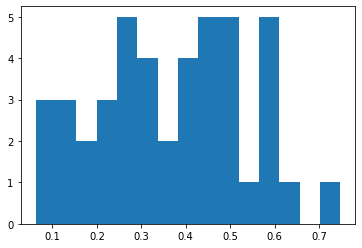

In [12]:
plt.hist(SER_rhythm_list_poly,bins=15)

(array([357.,  15.,   9.,   9.,   6.,   7.,   9.,   5.,   2.,   1.]),
 array([0.        , 0.07477477, 0.14954955, 0.22432432, 0.2990991 ,
        0.37387387, 0.44864865, 0.52342342, 0.5981982 , 0.67297297,
        0.74774775]),
 <BarContainer object of 10 artists>)

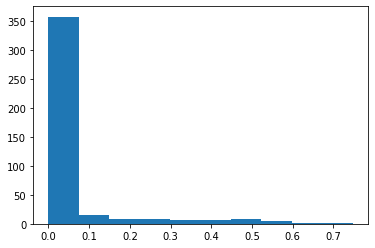

In [14]:
plt.hist(SER_rhythm_list)

## New data

### FaSolLa

In [70]:
model_pred_folder="./predictionFaSolLa/"
SER_rhythm_list,SER_pitch_list,SER_pitch_list_poly,SER_rhythm_list_poly,SER_list,polyphonic_seq=get_result(model_pred_folder)

In [71]:
polyphonic_seq/len(test_files)

0.4790697674418605

In [72]:
print("Moyenne SER pour le pitch sur sequence avec polyphonie: "+str(np.mean(SER_pitch_list_poly)))
print("Moyenne SER pour le rythme sur sequence avec polyphonie: "+str(np.mean(SER_rhythm_list_poly)))
print("Moyenne SER pour le rythme:  "+str(np.mean(SER_rhythm_list)))
print("Moyenne SER pour le pitch:  "+str(np.mean(SER_pitch_list)))

Moyenne SER pour le pitch sur sequence avec polyphonie: 0.381244855126756
Moyenne SER pour le rythme sur sequence avec polyphonie: 0.17919545200496328
Moyenne SER pour le rythme:  0.09645869326969492
Moyenne SER pour le pitch:  0.21397831194322203


In [74]:
SER_list_pitch_FaSolLa=SER_pitch_list
SER_list_rhythm_FaSolLa=SER_rhythm_list

### DoReMi

In [75]:
model_pred_folder="./predictionDoReMi/"
SER_rhythm_list,SER_pitch_list,SER_pitch_list_poly,SER_rhythm_list_poly,SER_list,polyphonic_seq=get_result(model_pred_folder)

In [76]:
print("Moyenne SER pour le pitch sur sequence avec polyphonie: "+str(np.mean(SER_pitch_list_poly)))
print("Moyenne SER pour le rythme sur sequence avec polyphonie: "+str(np.mean(SER_rhythm_list_poly)))
print("Moyenne SER pour le rythme:  "+str(np.mean(SER_rhythm_list)))
print("Moyenne SER pour le pitch:  "+str(np.mean(SER_pitch_list)))

Moyenne SER pour le pitch sur sequence avec polyphonie: 0.6613408119556714
Moyenne SER pour le rythme sur sequence avec polyphonie: 0.465695118776459
Moyenne SER pour le rythme:  0.2842902954124691
Moyenne SER pour le pitch:  0.40391224633141953


In [85]:
SER_list_pitch_DoReMi=SER_pitch_list
SER_list_rhythm_DoReMi=SER_rhythm_list

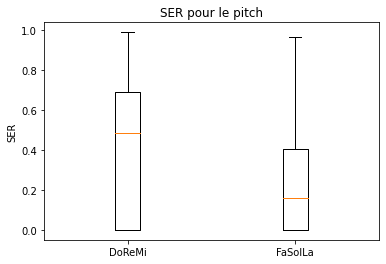

In [92]:
plt.boxplot([SER_list_pitch_DoReMi,SER_list_pitch_FaSolLa],labels=["DoReMi","FaSolLa"])
plt.ylabel("SER")
plt.title("SER pour le pitch")
plt.show()

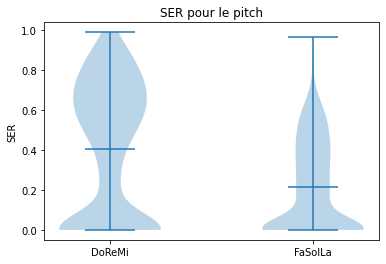

In [126]:
plt.violinplot([SER_list_pitch_DoReMi,SER_list_pitch_FaSolLa],showmeans=True,showextrema=True)
plt.xticks(ticks=[1,2],labels=["DoReMi","FaSolLa"])
plt.ylabel("SER")
plt.title("SER pour le pitch")
plt.show()

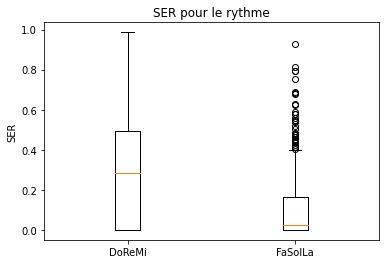

In [108]:
plt.boxplot([SER_list_rhythm_DoReMi,SER_list_rhythm_FaSolLa],labels=["DoReMi","FaSolLa"])
plt.ylabel("SER")
plt.title("SER pour le rythme")
plt.show()

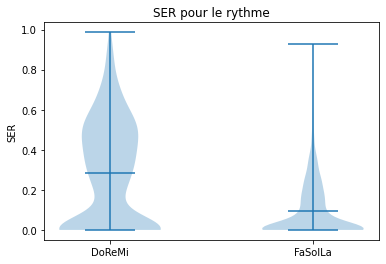

In [128]:
plt.violinplot([SER_list_rhythm_DoReMi,SER_list_rhythm_FaSolLa],showmeans=True,showextrema=True)
plt.xticks(ticks=[1,2],labels=["DoReMi","FaSolLa"])
plt.ylabel("SER")
plt.title("SER pour le rythme")
plt.show()